In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from local_utilities import load_as_df

In [10]:
stock_list = load_as_df('select * from base_stocks where market = "主板"')
s1,s2,s3,s4 = stock_list.ts_code[:500], stock_list.ts_code[500:1000], stock_list.ts_code[1000:1500], stock_list[1500:]

In [66]:
ts_code = s1[0]
def find_spec(ts_code, start_day='2019-01-01'):
    df_days = load_as_df('select * from tickers where ts_code = "{}" and trade_date >= "{}"'.format(ts_code, start_day))
    chg_times, vol_times = 0, 0
    try:
        if df_days.shape[0] > 0:
            spec_arr = pd.qcut(np.abs(df_days.pct_chg), 10, duplicates='drop').value_counts()
            spec_chg = spec_arr.keys()[0].left
            spec_vol = pd.qcut(np.abs(df_days.vol), 10).value_counts().keys()[0].left
            chg_times, vol_times = df_days[-10:][df_days.pct_chg > spec_bar].shape[0], df_days[-10:][df_days.vol > spec_vol].shape[0]
    except Exception as e:
        print('ts_code:{}, err:{}'.format(ts_code, e))
    return (ts_code, chg_times, vol_times)

In [67]:
spec_list = []
for s in s1:
    spec_list.append(find_spec(s))

ts_code:000552.SZ, err:Bin edges must be unique: array([0.     , 0.     , 0.3849 , 0.4423 , 0.7704 , 0.8889 , 1.1765 ,
       1.49923, 1.88916, 2.79592, 9.8765 ]).
You can drop duplicate edges by setting the 'duplicates' kwarg
ts_code:000572.SZ, err:Bin edges must be unique: array([ 0.     ,  0.     ,  0.5263 ,  0.58582,  1.04062,  1.3453 ,
        1.71182,  2.38891,  3.2787 ,  4.94557, 10.     ]).
You can drop duplicate edges by setting the 'duplicates' kwarg
ts_code:000573.SZ, err:Bin edges must be unique: array([ 0.     ,  0.     ,  0.33852,  0.52734,  0.6949 ,  0.9419 ,
        1.27686,  1.56299,  1.98284,  2.91925, 10.1754 ]).
You can drop duplicate edges by setting the 'duplicates' kwarg
ts_code:000585.SZ, err:Bin edges must be unique: array([0.     , 0.     , 0.49068, 0.57338, 0.96932, 1.1765 , 1.53534,
       1.92592, 2.67238, 4.30443, 5.303  ]).
You can drop duplicate edges by setting the 'duplicates' kwarg
ts_code:000630.SZ, err:Bin edges must be unique: array([ 0.     ,  0. 

In [68]:
df_days[df_days.ts_code == '000552.SZ']

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245E1B6BA60>],
      dtype=object)

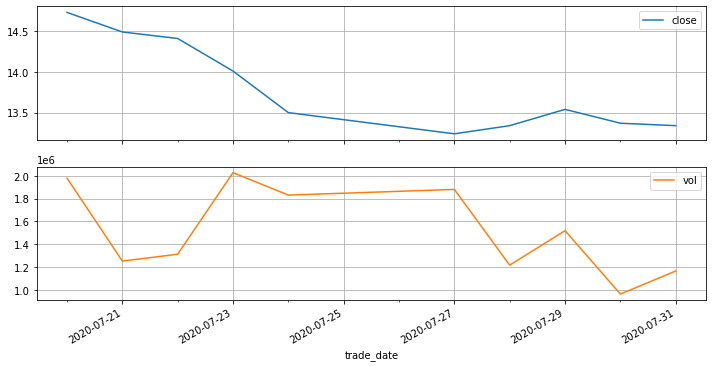

In [52]:
df_sample[['close','vol']].plot(subplots=True, grid=True, layout=(2,1), figsize=(12,6))